In [13]:
import numpy as np
import py3Dmol
from ase import Atoms
from ase.build import fcc111
from IPython.display import display
import os

# Create Au(111) surface
# Parameters for gold
a = 4.08  # lattice constant for gold in Angstrom
size = (4, 4, 2)  # size of the surface (x, y, z) in unit cells
vacuum = 10.0  # vacuum above the surface in Angstrom

# Create the Au(111) surface
au_surface = fcc111('Au', size=size, a=a, vacuum=vacuum)

# Add a single Au atom as adsorbate
# Position it at a hollow site on the surface
# Find the highest z-coordinate in the surface
max_z = max(au_surface.positions[:, 2])
# Add the Au atom about 2 Angstrom above the surface
height = 3.  # height between surface and adsorbate in Angstrom
adsorbate_position = [size[0]*a/2, size[1]*a/2 - 3, max_z + height]
adsorbate = Atoms('Au', positions=[adsorbate_position])

# Combine the surface and adsorbate
combined_system = au_surface + adsorbate

# Visualize using py3Dmol
def view_with_py3dmol(atoms, width=500, height=500):
    """Visualize atoms object with py3Dmol"""
    # Get atomic positions and symbols
    positions = atoms.get_positions()
    symbols = atoms.get_chemical_symbols()
    
    # Create viewer
    view = py3Dmol.view(width=width, height=height)
    
    # Add atoms as spheres
    for i, (pos, sym) in enumerate(zip(positions, symbols)):
        x, y, z = pos
        # Use different colors for surface and adsorbate
        if i == len(positions) - 1:  # adsorbate (last atom)
            color = 'red'
            radius = 1.5
        else:  # surface atoms
            color = 'gold'
            radius = 1.5
        
        view.addSphere({
            'center': {'x': x, 'y': y, 'z': z},
            'radius': radius,
            'color': color
        })
    
    # Set view options
    view.setStyle({'sphere': {}})
    view.zoomTo()
    view.setBackgroundColor('white')
    
    # Set camera position for better view of the adsorbate and surface
    # Set the camera view using a 4x4 transformation matrix:
    # [Right vector (x,y,z,0), Up vector (x,y,z,0), 
    #  Look-at vector (x,y,z,0), Position (x,y,z,1)]
    # view.setView([
    #     -0.97, -0.20, 0.15, 0,  # Right vector (camera x-axis)
    #     0.22, -0.97, 0.05, 0,   # Up vector (camera y-axis)
    #     0.13, 0.09, 0.99, 0,    # Look-at direction (camera z-axis)
    #     0, 0, 0, 1              # Camera position (translation)
    # ])
    
    return view

# Display the visualization
view = view_with_py3dmol(combined_system)
display(view)
# view.show()


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Alternative RDKit visualization:


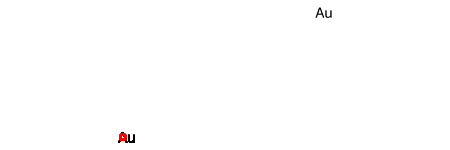

In [14]:
from rdkit import Chem
# from rdkit.Chem import AllChem
# from rdkit.Chem.Draw import IPythonConsole

# Create an empty molecule
mol = Chem.RWMol()

# Add atoms from the ASE structure
for i, (pos, sym) in enumerate(zip(combined_system.positions, combined_system.get_chemical_symbols())):
    atom = Chem.Atom(sym)
    atom_idx = mol.AddAtom(atom)
    # Set 3D coordinates
    conf = Chem.Conformer(len(combined_system))
    conf.SetAtomPosition(atom_idx, pos)
    
# Create the molecule
mol = mol.GetMol()
mol.AddConformer(conf)

# Display the molecule
print("Alternative RDKit visualization:")
display(mol)